In [1]:
from sklearn.manifold import TSNE
from src.DataLoader import DataLoader
from src.FaceRecogniser.ResNet34.ResNet34_A2 import get_ResNet_embeddings
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [13]:
plt.rcParams['figure.figsize'] = 10, 10

In [121]:
face_paths, labels, d1, d2 = DataLoader().load_lfw(N_train = 200)
resNet_embeddings, labels, face_paths = get_ResNet_embeddings(face_paths, labels)

No encodings found for 11 faces.


In [122]:
pd.Series(labels).value_counts()

1809    10
123      3
3936     3
1163     2
2394     2
        ..
2731     1
5290     1
2729     1
3385     1
1792     1
Length: 167, dtype: int64

In [123]:
X = resNet_embeddings
labels = LabelEncoder().fit_transform(labels)

In [124]:
pd.Series(labels).value_counts()

43     10
2       3
115     3
129     2
93      2
       ..
108     1
107     1
106     1
105     1
0       1
Length: 167, dtype: int64

In [126]:
method = TSNE(n_components=2,
                           init='pca',
                           early_exaggeration=12)
X_2D = method.fit_transform(X)

In [127]:
n_classes = len(np.unique(labels))

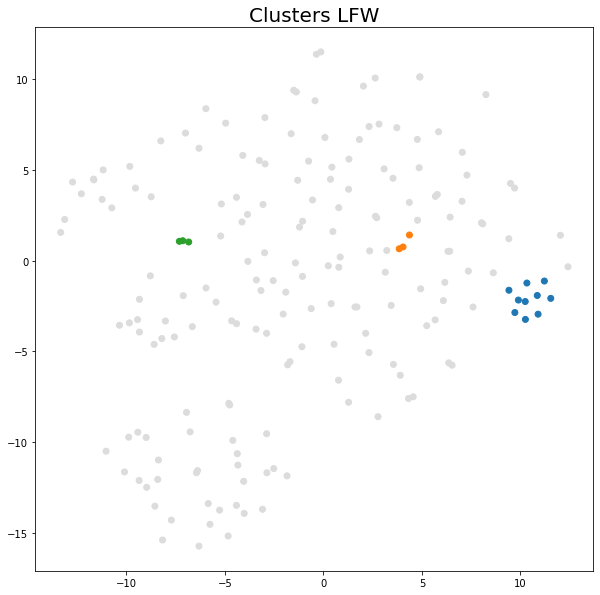

In [128]:
palette = sns.color_palette(n_colors =  3)
shown_classes = [43, 2, 115]
colors = [palette[shown_classes.index(i)] if i in shown_classes else (220./255,220./255,220./255) for i in labels]
plt.scatter(X_2D[:,0], X_2D[:,1], c = colors)
plt.title('Clusters LFW', size= 20)
plt.savefig('clusters_lfw.png')

In [129]:
face_paths, labels = DataLoader().load_A2()
resNet_embeddings, labels, face_paths = get_ResNet_embeddings(face_paths, labels)

No encodings found for 172 faces.


In [130]:
X = resNet_embeddings
labels = LabelEncoder().fit_transform(labels)

In [131]:
method = TSNE(n_components=2,
                           init='pca',
                           early_exaggeration=12)
X_2D = method.fit_transform(X)

In [132]:
n_classes = len(np.unique(labels))

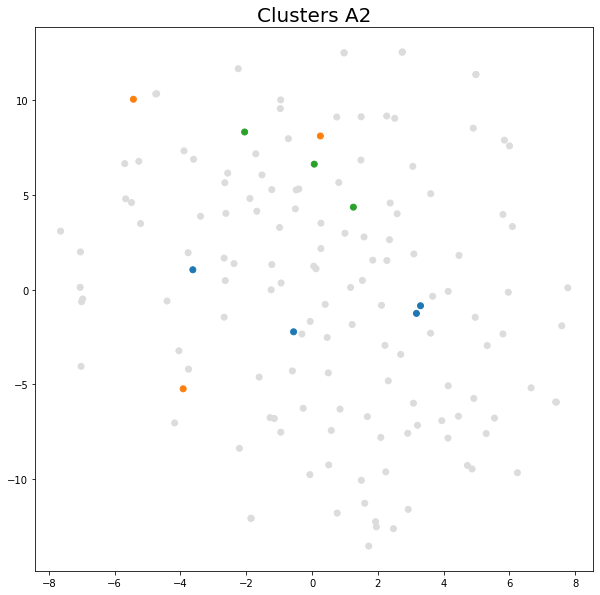

In [133]:
palette = sns.color_palette(n_colors =  5)
shown_classes = [49,0,27] 
colors = [palette[shown_classes.index(i)] if i in shown_classes else (220./255,220./255,220./255) for i in labels]
plt.scatter(X_2D[:,0], X_2D[:,1], c = colors)
plt.title('Clusters A2', size = 20)
plt.savefig('clusters_a2.png')